In [12]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import model_selection
from sklearn.ensemble import StackingClassifier
import joblib
import warnings
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split

In [13]:
warnings.filterwarnings('ignore')
data = pd.read_csv("heart.csv")
df = pd.DataFrame(data)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [14]:
df.dropna()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [15]:
X = data.drop('target',axis=1)
y = data['target']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 85.25%


In [16]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


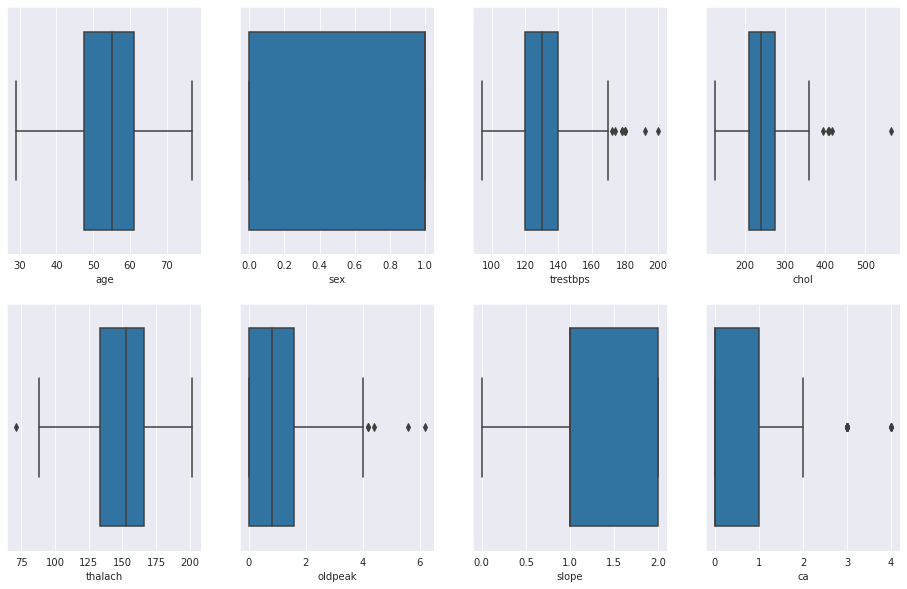

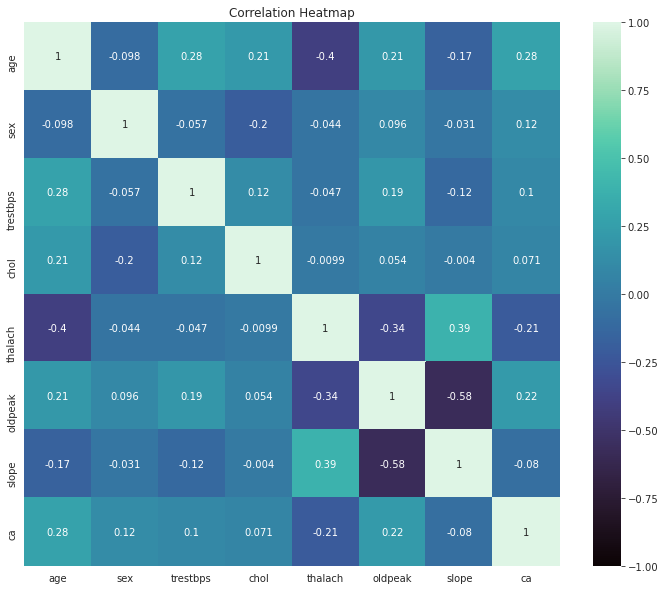

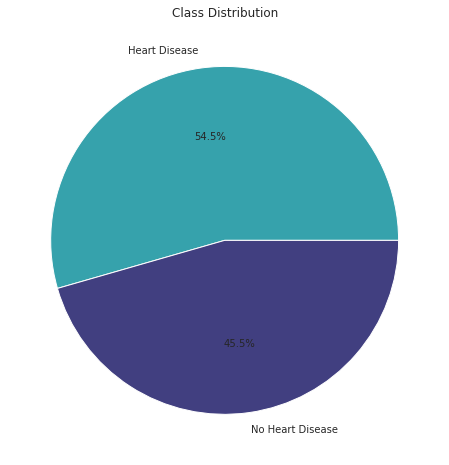

        age  sex  trestbps      chol  fbs  restecg   thalach  exang  oldpeak  \
0  0.592593  0.0      0.75 -0.110236  1.0     -1.0 -0.092308    0.0   0.9375   
1 -1.333333  0.0      0.00  0.157480  0.0      0.0  1.046154    0.0   1.6875   
2 -1.037037 -1.0      0.00 -0.566929  0.0     -1.0  0.584615    0.0   0.3750   
3  0.074074  0.0     -0.50 -0.062992  0.0      0.0  0.769231    0.0   0.0000   
4  0.148148 -1.0     -0.50  1.795276  0.0      0.0  0.307692    1.0  -0.1250   

    ca  ...  CP_1  CP_2  CP_3  SL_0  SL_1  SL_2  TH_0  TH_1  TH_2  TH_3  
0  0.0  ...   0.0   0.0   1.0   1.0   0.0   0.0   0.0   1.0  -1.0   0.0  
1  0.0  ...   0.0   1.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0  
2  0.0  ...   1.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0  
3  0.0  ...   1.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0  
4  0.0  ...   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0  

[5 rows x 21 columns]


In [28]:
numeric_features = ['age', 'sex', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope', 'ca']
eda_df = data.loc[:, numeric_features].copy()
plt.figure(figsize=(16, 10))

for i in range(len(eda_df.columns)):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(eda_df[eda_df.columns[i]])

plt.show()
corr = eda_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap='mako')
plt.title("Correlation Heatmap")
plt.show()
plt.figure(figsize=(8, 8))
plt.pie(data['target'].value_counts(), labels=["Heart Disease", "No Heart Disease"], autopct='%.1f%%', colors=['#36a2ac', '#413f80'])
plt.title("Class Distribution")
plt.show()
def onehot_encode(df, column_dict):
    df = df.copy()
    for column, prefix in column_dict.items():
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df
def preprocess_inputs(df, scaler):
    df = df.copy()
    nominal_features = ['cp', 'slope', 'thal']
    df = onehot_encode(df, dict(zip(nominal_features, ['CP', 'SL', 'TH'])))
    
    # Split df into X and y
    y = df['target'].copy()
    X = df.drop('target', axis=1).copy()
    
    # Scale X
    X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
    
    return X, y
X, y = preprocess_inputs(data, RobustScaler())
#X = df.drop('target',axis=1)
#y = df['target']
print(X.head())
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [29]:
#removal of outliers
'''q1 = data.trestbps.quantile(0.25)
q2 = data.trestbps.quantile(0.75)
print(q1,q2)
IQR1 = q2-q1
print(IQR1)
lower_limit = q1-1.5*IQR1
upper_limit = q2+1.5*IQR1
print(lower_limit,upper_limit)

q3 = data.chol.quantile(0.25)
q4 = data.chol.quantile(0.75)
print(q3,q4)
IQR2 = q4-q3
print(IQR2)
lower_limit1 = q3-1.5*IQR2
upper_limit1= q4+1.5*IQR2
print(lower_limit1,upper_limit1)

q5 = data.thalach.quantile(0.25)
q6 = data.thalach.quantile(0.75)
print(q5,q6)
IQR3 = q6-q5
print(IQR3)
lower_limit2 = q5-1.5*IQR3
upper_limit2 = q6+1.5*IQR3
print(lower_limit2,upper_limit2)

q7 = data.oldpeak.quantile(0.25)
q8 = data.oldpeak.quantile(0.75)
print(q7,q8)
IQR4 = q8-q7
print(IQR4)
lower_limit3= q7-1.5*IQR3
upper_limit3 = q8+1.5*IQR3
print(lower_limit3,upper_limit3)

q9 = data.ca.quantile(0.25)
q10 = data.ca.quantile(0.75)
print(q9,q10)
IQR5 = q10-q9
print(IQR5)
lower_limit4 = q9-1.5*IQR3
upper_limit4 = q10+1.5*IQR3
print(lower_limit4,upper_limit4)

#df_no_outlier =data[(data.trestbps>lower_limit)&(data.trestbps<upper_limit)&(data.chol>lower_limit1)&(data.chol<upper_limit1)&(data.thalach>lower_limit2)&(data.thalach<upper_limit2)&(data.oldpeak>lower_limit3)&(data.oldpeak<upper_limit3)&(data.ca>lower_limit4)&(data.ca<upper_limit4)]
df_no_outlier
df_no_outlier =data[(data.chol>lower_limit1)&(data.chol<upper_limit1)&(data.thalach>lower_limit2)&(data.thalach<upper_limit2)]
df_no_outlier'''

'q1 = data.trestbps.quantile(0.25)\nq2 = data.trestbps.quantile(0.75)\nprint(q1,q2)\nIQR1 = q2-q1\nprint(IQR1)\nlower_limit = q1-1.5*IQR1\nupper_limit = q2+1.5*IQR1\nprint(lower_limit,upper_limit)\n\nq3 = data.chol.quantile(0.25)\nq4 = data.chol.quantile(0.75)\nprint(q3,q4)\nIQR2 = q4-q3\nprint(IQR2)\nlower_limit1 = q3-1.5*IQR2\nupper_limit1= q4+1.5*IQR2\nprint(lower_limit1,upper_limit1)\n\nq5 = data.thalach.quantile(0.25)\nq6 = data.thalach.quantile(0.75)\nprint(q5,q6)\nIQR3 = q6-q5\nprint(IQR3)\nlower_limit2 = q5-1.5*IQR3\nupper_limit2 = q6+1.5*IQR3\nprint(lower_limit2,upper_limit2)\n\nq7 = data.oldpeak.quantile(0.25)\nq8 = data.oldpeak.quantile(0.75)\nprint(q7,q8)\nIQR4 = q8-q7\nprint(IQR4)\nlower_limit3= q7-1.5*IQR3\nupper_limit3 = q8+1.5*IQR3\nprint(lower_limit3,upper_limit3)\n\nq9 = data.ca.quantile(0.25)\nq10 = data.ca.quantile(0.75)\nprint(q9,q10)\nIQR5 = q10-q9\nprint(IQR5)\nlower_limit4 = q9-1.5*IQR3\nupper_limit4 = q10+1.5*IQR3\nprint(lower_limit4,upper_limit4)\n\n#df_no_out

In [30]:
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('lr', LogisticRegression(C= 1.0, penalty= 'l2', solver= 'lbfgs')))
    level0.append(('knn', KNeighborsClassifier(metric= 'manhattan', n_neighbors= 19, weights= 'uniform')))
    level0.append(('cart', DecisionTreeClassifier(criterion= 'gini', max_depth= 4, max_features= 'auto', min_samples_leaf= 6, min_samples_split= 7)))
    level0.append(('svm',SVC(C= 1000, gamma= 0.0001, kernel= 'rbf')))
    level0.append(('bayes', GaussianNB()))
    level0.append(('rfa',RandomForestClassifier()))
    level0.append(('neural',MLPClassifier(max_iter=1500)))    
        # define meta learner model
    level1 = LogisticRegression(C= 1.0, penalty= 'l2', solver= 'lbfgs')
        # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

In [31]:
def get_models():
    models = dict()
    models['lr'] = LogisticRegression()
    models['knn'] = KNeighborsClassifier()
    models['cart'] = DecisionTreeClassifier()
    models['svm'] = SVC()
    models['bayes'] = GaussianNB()
    models['neural'] = MLPClassifier()  
    models['stacking'] = get_stacking()
    return models
model=get_stacking()

In [33]:
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=15, n_repeats=5, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

>lr 0.840 (0.067)
>knn 0.827 (0.076)
>cart 0.742 (0.078)
>svm 0.837 (0.076)
>bayes 0.814 (0.088)
>neural 0.828 (0.077)
>stacking 0.831 (0.066)


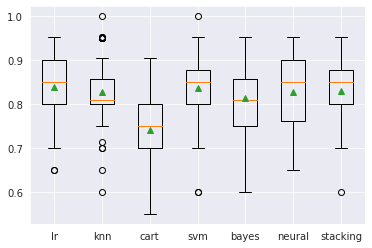

In [34]:
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [35]:
#Bagging 
#level1 = LogisticRegression(C= 1.0, penalty= 'l2', solver= 'newton-cg')
model1= BaggingClassifier(n_estimators=500,max_samples=1.0)
#model1 = StackingClassifier(estimators=level2, final_estimator=level1, cv=10)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model1, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.798 (0.059)


In [36]:
model2 = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10),n_estimators=5000)
# fit the model on the whole dataset
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model2, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.729 (0.082)


In [37]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix
def get_voting():
    # define the base models
    models = list()
    models.append(('knn1', model))
    models.append(('knn3',  model1))
    models.append(('knn5',  model2))
    # define the voting ensemble
    ensemble = VotingClassifier(estimators=models, voting='hard')
    return ensemble
 
# get a list of models to evaluate
def get_models():
    models = dict()
    models['knn1'] = model
    models['knn3'] = model1
    models['knn7'] = model2
    models['hard_voting'] = get_voting()
    return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=15, n_repeats=5, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores
 
# define dataset
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        17
           1       0.86      0.86      0.86        14

    accuracy                           0.87        31
   macro avg       0.87      0.87      0.87        31
weighted avg       0.87      0.87      0.87        31

[[15  2]
 [ 2 12]]
>knn1 0.824 (0.066)
              precision    recall  f1-score   support

           0       0.78      0.82      0.80        17
           1       0.77      0.71      0.74        14

    accuracy                           0.77        31
   macro avg       0.77      0.77      0.77        31
weighted avg       0.77      0.77      0.77        31

[[14  3]
 [ 4 10]]
>knn3 0.802 (0.073)
              precision    recall  f1-score   support

           0       0.72      0.76      0.74        17
           1       0.69      0.64      0.67        14

    accuracy                           0.71        31
   macro avg       0.71      0.70      0.70       